<a href="https://colab.research.google.com/github/hbisgin/DeepLearning/blob/main/DL_8_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import *
from tqdm import tqdm

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time

In [4]:
activation_input = np.linspace(-10, 10, num=1000)

Text(0, 0.5, 'Activation')

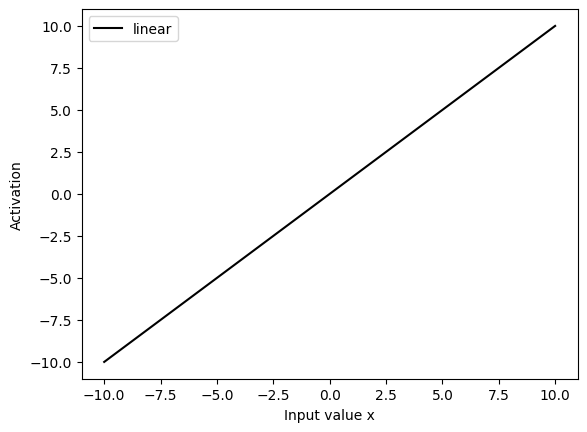

In [6]:
ax = sns.lineplot(x=activation_input, y=activation_input, color='black', label="linear")
ax.set_xlabel('Input value x')
ax.set_ylabel('Activation')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1725079079.py:2: SyntaxWarning: invalid escape sequence '\s'
  ax = sns.lineplot(x=activation_input, y=sigmoid_activation, color='blue', label="$\sigma(x)$")


Text(0, 0.5, 'Activation')

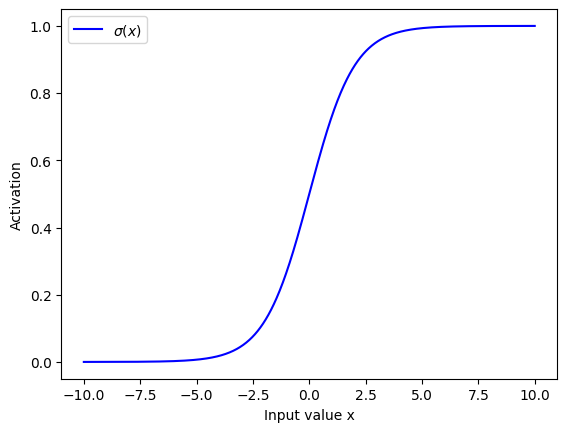

In [7]:
sigmoid_activation = np.exp(activation_input)/(np.exp(activation_input)+1)
ax = sns.lineplot(x=activation_input, y=sigmoid_activation, color='blue', label="$\sigma(x)$")
ax.set_xlabel('Input value x')
ax.set_ylabel('Activation')

Text(0, 0.5, 'Activation')

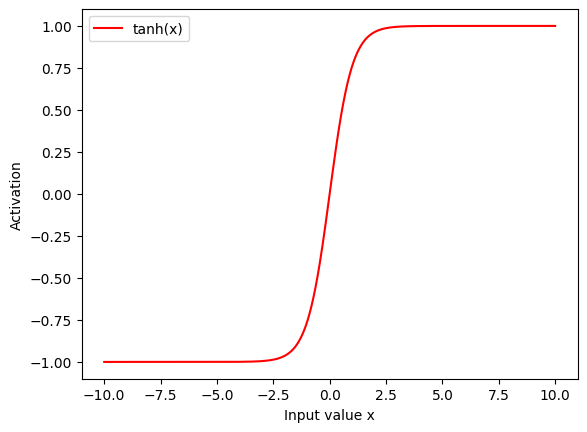

In [8]:
tanh_activation = np.tanh(activation_input)
ax = sns.lineplot(x=activation_input, y=tanh_activation, color='red', label="tanh(x)")
ax.set_xlabel('Input value x')
ax.set_ylabel('Activation')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-418459390.py:2: SyntaxWarning: invalid escape sequence '\s'
  ax = sns.lineplot(x=activation_input, y=sigmoid_activation, color='blue', label="$\sigma(x)$")


Text(0, 0.5, 'Activation')

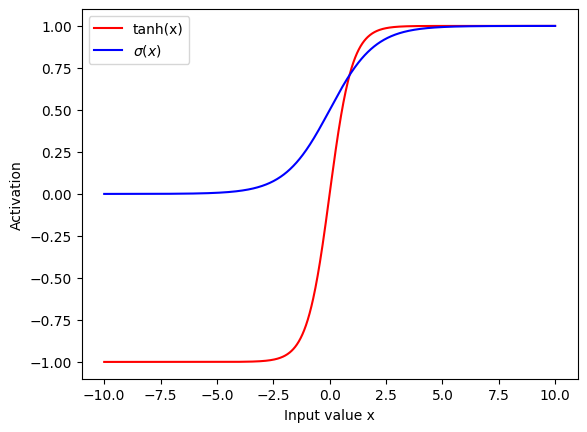

In [9]:
sns.lineplot(x=activation_input, y=tanh_activation, color='red', label="tanh(x)")
ax = sns.lineplot(x=activation_input, y=sigmoid_activation, color='blue', label="$\sigma(x)$")
ax.set_xlabel('Input value x')
ax.set_ylabel('Activation')

Text(24.0, 0.5, 'Activation')

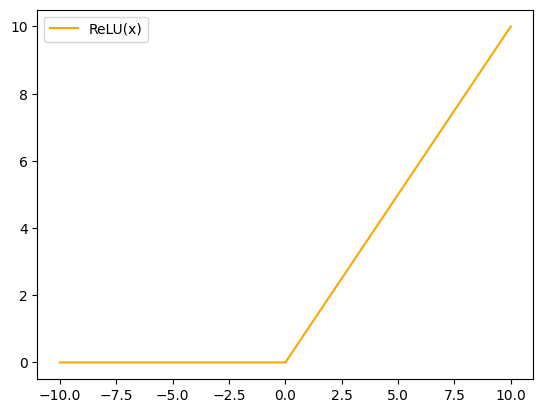

In [10]:
def relu(x):
    return np.maximum(0, x)

sns.lineplot(x=activation_input, y=relu(activation_input), color='orange', label="ReLU(x)")
ax.set_xlabel('Input value x')
ax.set_ylabel('Activation')

In [28]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device="cpu"):
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epoch"):
        model = model.train()
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            inputs = inputs.to(device)
            labels = labels.to(device)
            #labels = moveTo(labels, device)

            optimizer.zero_grad()

            y_hat = model(inputs) #forward pass f(x)=wx+b-->y^hat

            loss = loss_func(y_hat, labels) #\Sigma((y^hat-y)^2)
            loss.backward()
            optimizer.step() #w -\eta*\nabla

            running_loss += loss.item()


<Axes: >

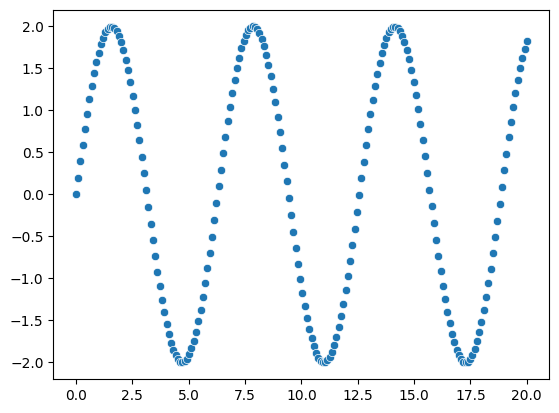

In [19]:
X = np.linspace(0, 20, num=200)
y = np.sin(X)*2
sns.scatterplot(x=X, y=y)

<Axes: >

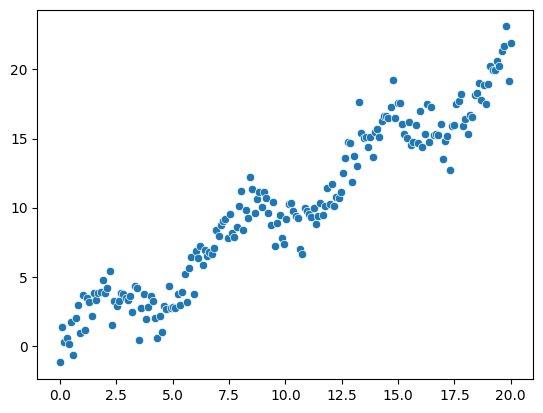

In [20]:
X = np.linspace(0, 20, num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
sns.scatterplot(x=X, y=y)

Dataset

In [24]:
class Simple1DRegressionDataset(Dataset):

    def __init__(self, X, y):
        super(Simple1DRegressionDataset, self).__init__() #you can update the constructor
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)
#you can do the tensor conversion here instead of your getitem

    def __getitem__(self, index):
        #you can only return your tensors here without casting/converting
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]



In [25]:
dataset = Simple1DRegressionDataset(X, y)

DataLoader

In [30]:
training_loader = DataLoader(dataset, shuffle=True)
loss_func = nn.MSELoss()

In [ ]:
model = nn.Sequential(
    nn.Linear(1,  10),#hidden layer
    nn.Tanh(),#activation
    nn.Linear(10, 1),#output layer
)

train_simple_network(model, loss_func, training_loader, epochs=200)

<Axes: >

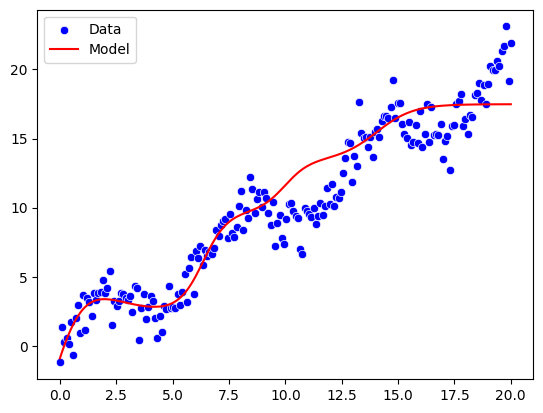

In [32]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Model') #What our model learned

In [33]:
model2 = nn.Sequential(
    nn.Linear(1,  10),#hidden layer
    nn.ReLU(),#activation
    nn.Linear(10, 1),#output layer
)

train_simple_network(model2, loss_func, training_loader, epochs=100)

Epoch: 100%|██████████| 100/100 [00:16<00:00,  6.20it/s]


<Axes: >

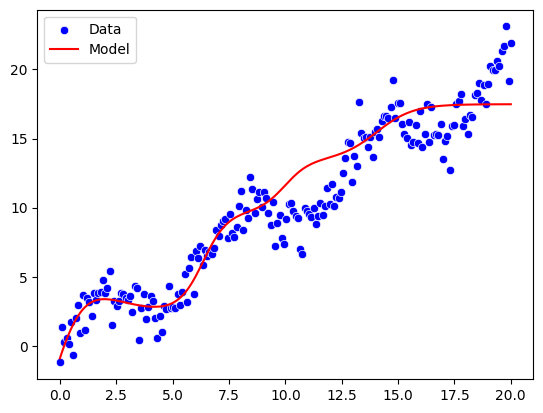

In [34]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X.reshape(-1,1), dtype=torch.float32)).cpu().numpy()

sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Model') #What our model learned